Step 1: Import packages
===

- Numpy` is used for the vectors
- `scipy` is unused here, but is common
- `matpllotlib.pyplot` is used for plotting

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Step 2: Problem description
===
Here you will set up the problem for
$$ u_t - c u_x = 0$$
with periodic BC on the interval [0,1]

In [2]:
c = 1.0
T = 1.0 / c # end time

Step 3: Set up the grid
===
dx will be the grid spacing in the $x$-direction  
x will be the grid coordinates  
xx will be really fine grid coordinates

In [3]:
nx = 82
x = np.linspace(0, 1, nx, endpoint=False)
dx = x[1] - x[0]
xx = np.linspace(0, 1, 1000, endpoint=False)

Now define an initial condition

In [4]:
def square_wave(x):
    u = np.zeros(x.shape)
    u[np.intersect1d(np.where(x>0.4), np.where(x<0.6))] = 1.0
    return u

def sine_wave(x):
    return np.sin(3.14159265359*x)  

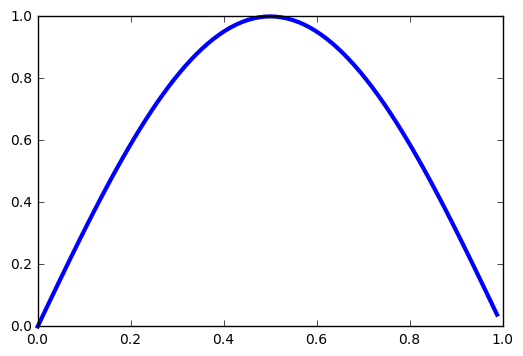

In [5]:
g = sine_wave
plt.plot(x, g(x), lw=3, clip_on=False)

Step 4: Setting dt
===
Now we need a time step.  Let
$$ \Delta t = \Delta x \frac{\lambda}{c}$$
So we need a parameter $\lambda$

<span style="color:red">What happens when $\lambda>1.0$?</span>

In [6]:
lmbda = 1.03
dt = dx * lmbda / c
nt = int(T/dt)
print('T = %g' % T)
print('tsteps = %d' % nt)
print('    dx = %g' % dx)
print('    dt = %g' % dt)
print('lambda = %g' % lmbda)

T = 1
tsteps = 79
    dx = 0.0121951
    dt = 0.012561
lambda = 1.03


Step 5: Scheme
===

Crank-Nicolson:
$$ u_t - c u_x = 0$$  
$$ u_t = c u_x $$  
$$ \frac{u_i^{n+1} - u_i^n}{\Delta t} = c \frac{1}{2}(\frac{u_{i+1}^n - u_{i-1}^n}{2 \Delta x} + \frac{u_{i+1}^{n+1} - u_{i-1}^{n+1}}{2 \Delta x})$$  
$$ u_i^{n+1} = u_i^n + \frac{c \Delta t}{4 \Delta x}(u_{i+1}^n - u_{i-1}^n + u_{i+1}^{n+1} - u_{i-1}^{n+1})$$

This is an implicit scheme, so we'll need to solve a system. Move all $u^{n+1}$ terms to left side and let $\lambda = \frac{c \Delta t}{\Delta x}$:

$$ -\frac{\lambda}{4} u_{i+1}^{n+1} + u_i^{n+1} + \frac{\lambda}{4} u_{i-1}^{n+1} = \frac{\lambda}{4} u_{i+1}^n + u_i^n - \frac{\lambda}{4} u_{i-1}^n$$

Set up a system of equations:

$$M_1 u^{n+1} = M_2 u^n$$

Where $M_1 =$
\begin{bmatrix}
    1 & \frac{\lambda}{4} & 0 & \dots & 0 & -\frac{\lambda}{4} \\
    -\frac{\lambda}{4} & 1 & \frac{\lambda}{4} & & & 0 \\
    0 & -\frac{\lambda}{4} & \ddots & \ddots & & \vdots \\
    \vdots & & \ddots & & & 0 \\
    0 & & & & & \frac{\lambda}{4} \\
    \frac{\lambda}{4} & 0 & \dots & 0 & -\frac{\lambda}{4} & 1
\end{bmatrix}

The elements in the top right and bottom left corners enforce periodic boundary conditions.

And $M_2 = M_1^T$.

Step 6: Run and Animate
===
For ipython notebooks be sure to use clear_output.  Alternatively, `animation` from `matplotlib` may be useful.

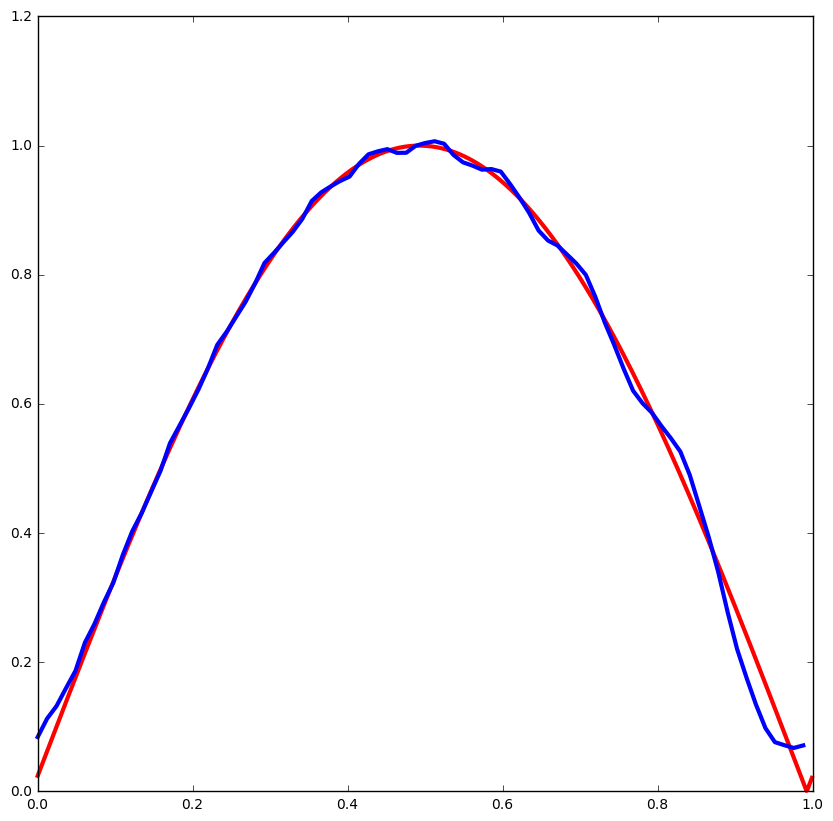

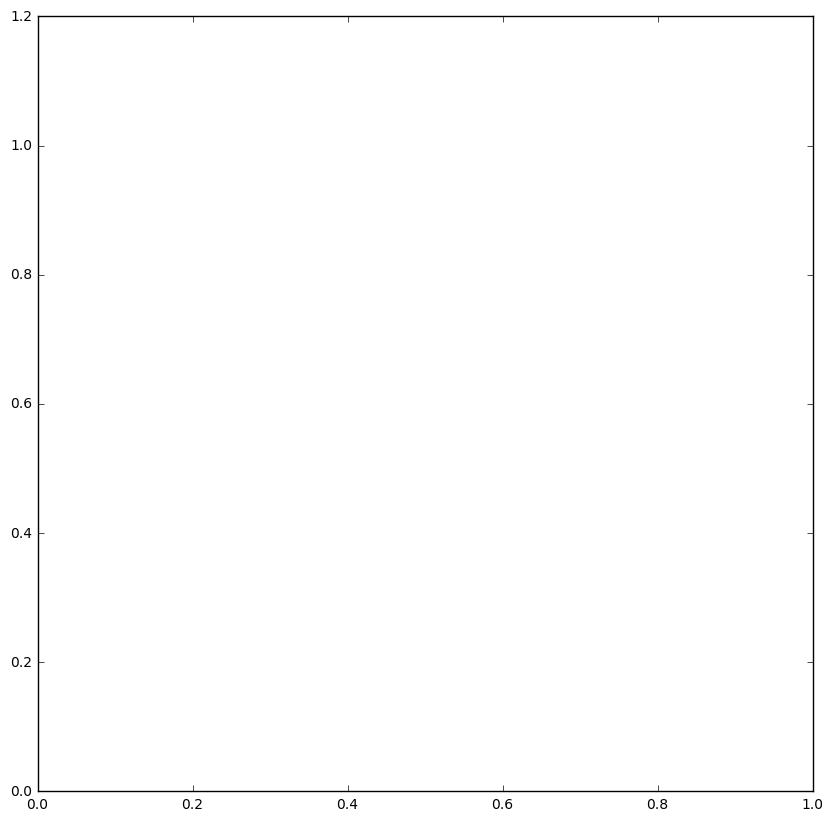

In [7]:
import time
from IPython.display import clear_output, display
plotit = True
u = g(x)

# create M1:
lmbda_array = np.ones(nx-1)*[lmbda/4.0]
m1 = np.diag(-1*lmbda_array, -1) + np.identity(nx) + np.diag(lmbda_array, 1)

# enforce periodic boundary conditions
m1[0][nx-1] = -lmbda/4.0
m1[nx-1][0] = lmbda/4.0
    
# create M2:
m2 = m1.transpose()

if plotit:
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.set_title('u vs x')

for n in range(0, nt):
   
    u = np.linalg.solve(m1, np.dot(m2,u))
    uex = g((xx - c * (n+1) * dt) % 1.0)
    if plotit:
        ax.plot(xx, uex, 'r-', lw=3, clip_on=False)
        ax.plot(x, u, '-', lw=3, clip_on=False)
        clear_output(True)
        display(fig)
        ax.cla()

Step 7: Check the error
===

In [8]:
n=nt-1
uex = g((x - c * (n+1) * dt) % 1.0)
error = u - uex
l2err = np.sqrt(dx * np.sum(error**2))
print(l2err)

0.0224103701666
